In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, ytr), (x_test, yts) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_test.shape[0])

x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

10000


In [3]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [166]:
x_train_noisy.shape

(60000, 784)

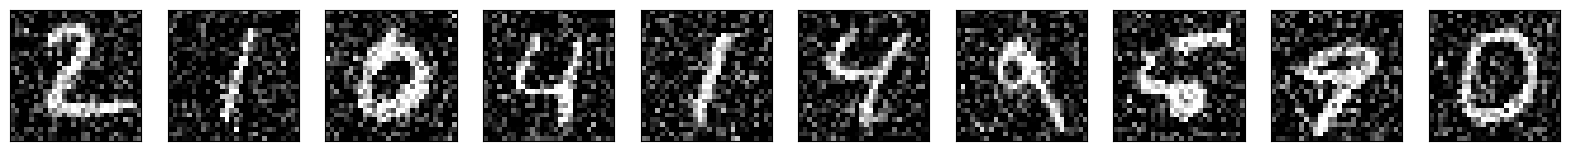

In [143]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [61]:
class FrobeniusRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, lambda_reg):
        self.lambda_reg = lambda_reg

    def __call__(self, weights):
        frobenius_norm = tf.reduce_sum(tf.square(tf.norm(weights)))
        return self.lambda_reg * frobenius_norm

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.optimizers import Adam

tf.config.experimental_run_functions_eagerly(True)

# This is the size of our encoded representations
encoding_dim = 100 

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',kernel_regularizer=FrobeniusRegularizer(lambda_reg=0.01))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_split=0.2,
                )

Epoch 1/25
  4/188 [..............................] - ETA: 3s - loss: 1.9098 

c:\Users\feder\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


188/188 [==============================] - 4s 22ms/step - loss: 0.3122 - val_loss: 0.0631
Epoch 2/25
188/188 [==============================] - 4s 22ms/step - loss: 0.0580 - val_loss: 0.0535
Epoch 3/25
188/188 [==============================] - 4s 22ms/step - loss: 0.0510 - val_loss: 0.0486
Epoch 4/25
188/188 [==============================] - 4s 22ms/step - loss: 0.0470 - val_loss: 0.0453
Epoch 5/25
188/188 [==============================] - 4s 22ms/step - loss: 0.0440 - val_loss: 0.0428
Epoch 6/25
188/188 [==============================] - 4s 22ms/step - loss: 0.0417 - val_loss: 0.0407
Epoch 7/25
188/188 [==============================] - 4s 22ms/step - loss: 0.0398 - val_loss: 0.0390
Epoch 8/25
188/188 [==============================] - 4s 22ms/step - loss: 0.0382 - val_loss: 0.0375
Epoch 9/25
188/188 [==============================] - 4s 22ms/step - loss: 0.0368 - val_loss: 0.0363
Epoch 10/25
188/188 [==============================] - 4s 24ms/step - loss: 0.0357 - val_loss: 0.0352


In [67]:
autoencoder.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_26 (Dense)            (None, 100)               78500     
                                                                 
 dense_27 (Dense)            (None, 784)               79184     
                                                                 
Total params: 157684 (615.95 KB)
Trainable params: 157684 (615.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
prediction = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


(100,)


<function matplotlib.pyplot.show(close=None, block=None)>

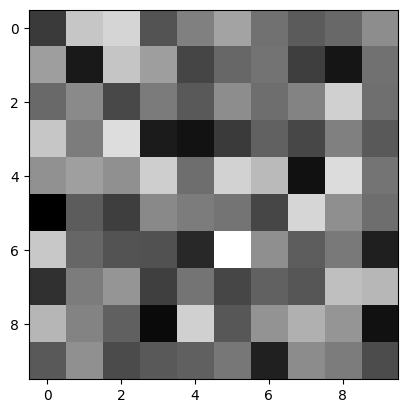

In [35]:
noise = np.zeros(100)
print(noise.shape)

noise = noise + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=noise.shape) 
plt.imshow(noise.reshape(10,10))

plt.show

In [39]:
imdim = 100
epochs = 100
noise = noise.reshape()
for i in range(epochs):
    noise = decoder.predict(noise.reshape(1,imdim))


ValueError: cannot reshape array of size 784 into shape (1,100)

<function matplotlib.pyplot.show(close=None, block=None)>

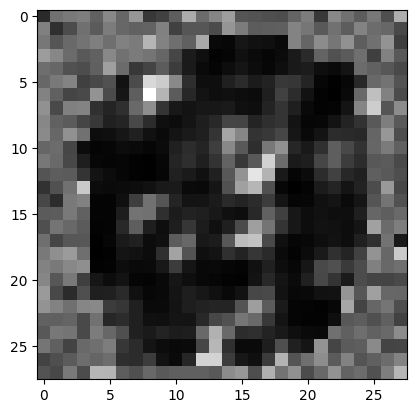

In [30]:
plt.imshow(primo.reshape(28,28))
plt.gray()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

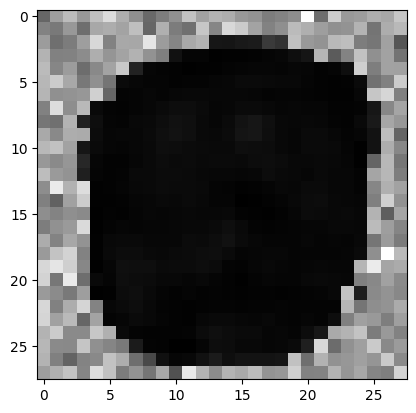

In [31]:
plt.imshow(secondo.reshape(28,28))
plt.gray()
plt.show

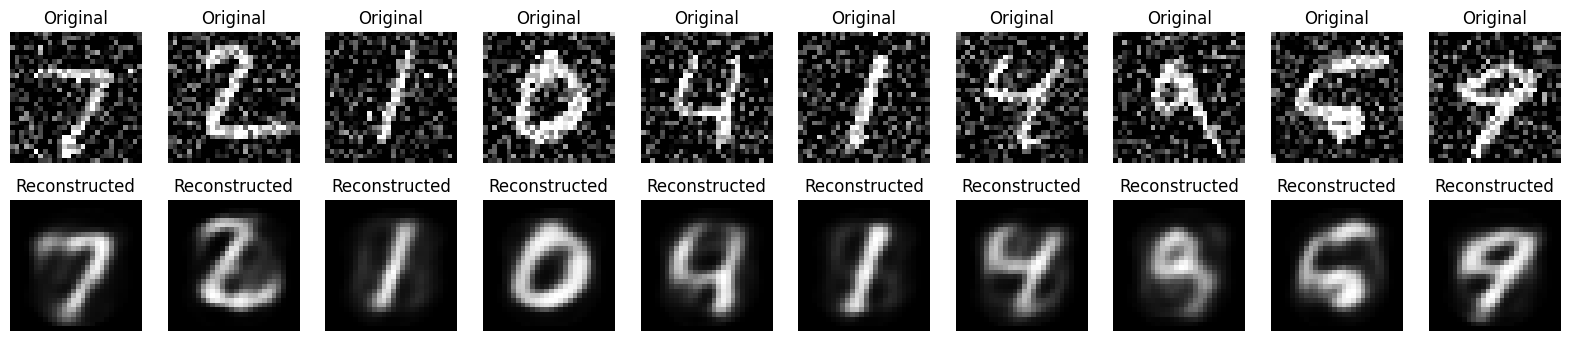

In [69]:
num_images = 10
plt.figure(figsize=(20, 4))

for i in range(num_images):
    # Immagine originale
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28),cmap="gray")
    plt.title('Original')
    plt.axis('off')
    
    # Immagine ricostruita
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(prediction[i].reshape(28, 28),cmap="gray")
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()


In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(second_layer_output)

In [ ]:
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

# Estrai le coordinate X e Y dall'embedded_data
x = pd.DataFrame(X_embedded[:, 0])
y = pd.DataFrame(X_embedded[:, 1])
label = pd.DataFrame(yts)

dataset = pd.concat([x,y,label],axis=1)
dataset.columns = ['x','y','number']

plt.figure(figsize=(12, 8))
sct = plt.scatter(dataset.x, dataset.y, c=dataset.number, cmap='tab10')


cb = plt.colorbar(label='Cifra', ticks=range(10))

plt.title('t-SNE Plot MNIST')
plt.show()


In [ ]:
a = dataset[(dataset.number == 1) & (dataset.x<-25)]
a

In [ ]:
plt.imshow(Xts_flat[5642].reshape(28,28),cmap="gray")
plt.show